In [164]:
# Import important libraries 

# Standard Python Libraries 

from collections import Counter, defaultdict
import html # for html manipulations
import json # for key-value pair data structures
import os
import re # regular expression
import time 


# 3rd Party Libraries

from bs4 import BeautifulSoup # HTML parsing
from IPython.display import HTML # render HTML in the notebook
import matplotlib.pyplot as plt # plotting library
import numpy as np
import pandas as pd # tabular data (Dataframes)
import requests # get/post HTML requests

In [165]:
# define the url of the website we are interested in 
all_prizes_url = 'https://www.nobelprize.org/prizes/lists/all-nobel-prizes/all/'

# save the contents of the url to a variable
response = requests.get(all_prizes_url) # requests.get returns an object with different key-value pairs 

print(f"The status code of the URL we selected is: {response.status_code}")

The status code of the URL we selected is: 200


In [166]:
# I want to show you what happens when you make a get request to a webpage that doesn't exist 
fake_url = 'https://www.google.com/fake'

google = requests.get(fake_url)

google.status_code ## As you can see you get a 404 status code which means the page doesn't exist 

404

In [167]:
html = response.text # saved the html content on the webpage to a variable

In [168]:
# Say I want to find all the occurances of my name, Aaron on the webpage
print(re.findall(r'Aaron \S+', html)) # \S non whitespace chars, notice how it caught the anchor closing tag
print(re.findall(r'Aaron \w+', html)) # \w word chars: letters, numbers, underscores

# there are two people with my name who won the Nobel Prize

['Aaron Ciechanover</a>,', 'Aaron Klug</a>']
['Aaron Ciechanover', 'Aaron Klug']


In [169]:
# Regex is nice but it is not as complex enough to do more intricate tasks and manipulating/extracting data from the DOM

# thats where BeautifulSoup comes in, it translates the html into a tree structure for Python to understand

soup = BeautifulSoup(html)

print(type(soup))

<class 'bs4.BeautifulSoup'>


In [170]:
# adds \n to make it more readable
indented_html = soup.prettify() # returns a string 

print(indented_html[:500])

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"212354677",accountID:"3196970",trustKey:"3196970",xpid:"VwcOV19UCBACVVNRAgUCUlc=",licenseKey:"NRJS-0940f7eaf4cb46e1cfe",applicationID:"212354543"};;/*! For license information please see


In [171]:
print(soup.select('title')) # selected all title tags, returns array
soup.select_one('a') # selected first anchor tag

[<title>All Nobel Prizes - NobelPrize.org</title>, <title>Open the search menu</title>, <title>Close the search menu</title>, <title>Open the search menu</title>, <title>Close the search menu</title>]


<a class="skip-link screen-reader-text" href="#content">
			Skip to content		</a>

In [172]:
print(soup.select('h3 a')[:3]) # selected all a tags in h3 element, first 3
soup.select('a')[:5] # selected first 5 a tags on the webpage

[<a href="https://www.nobelprize.org/prizes/physics/2024/summary/">
			Nobel Prize in Physics 2024		</a>, <a href="https://www.nobelprize.org/prizes/chemistry/2024/summary/">
			Nobel Prize in Chemistry 2024		</a>, <a href="https://www.nobelprize.org/prizes/medicine/2024/summary/">
			Nobel Prize in Physiology or Medicine 2024		</a>]


[<a class="skip-link screen-reader-text" href="#content">
 			Skip to content		</a>,
 <a aria-label="Nobel Prize" href="https://www.nobelprize.org" itemprop="url" name="top">
 <svg class="site-logo-icon site-logo-icon--big" fill="none" height="60" viewbox="0 0 77 60" width="77" xmlns="http://www.w3.org/2000/svg"><path d="M25.298 1.997h-4.631v14.66h-2.21V1.997h-4.674V0h11.515v1.997ZM42.126 0v16.657h-2.21V8.711h-9.179v7.946h-2.21V0h2.21v6.714h9.179V0h2.21Zm14.617 16.657V14.66h-7.691V8.711h7.011V6.714h-7.011V1.997h7.564V0h-9.731v16.657h9.858Zm-43.045 5.014V38.33h-1.53L2.225 25.41v12.918H.1V21.67h1.7l9.773 12.578V21.671h2.125Zm12.025-.34c-4.801 0-8.71 3.867-8.71 8.669 0 4.802 3.909 8.669 8.71 8.669 4.802 0 8.711-3.867 8.711-8.669 0-4.802-3.91-8.669-8.71-8.669Zm.043 2.083c3.527 0 6.459 2.932 6.459 6.586 0 3.654-2.932 6.586-6.46 6.586-3.526 0-6.458-2.932-6.458-6.586 0-3.654 2.932-6.586 6.459-6.586Zm23.116 9.943c0 2.932-2.125 4.972-5.227 4.972h-5.779V21.67h5.27c3.059 0 4.971 1.53 4.971 3.995 

In [173]:
tag = soup.select('.card-prize')[0]

print(tag.prettify())

<div class="card-prize">
 <h3>
  <a href="https://www.nobelprize.org/prizes/physics/2024/summary/">
   Nobel Prize in Physics 2024
  </a>
 </h3>
 <div class="card-prize--laureates">
  <div class="card-prize--laureates --two">
   <div class="card-prize--laureates--links">
    <a class="card-prize--laureates--links--link" href="https://www.nobelprize.org/prizes/physics/2024/hopfield/facts/">
     John J. Hopfield
    </a>
    and
    <a class="card-prize--laureates--links--link" href="https://www.nobelprize.org/prizes/physics/2024/hinton/facts/">
     Geoffrey Hinton
    </a>
   </div>
   <blockquote class="card-prize--laureates--motivation --last">
    “for foundational discoveries and inventions that enable machine learning with artificial neural networks”
   </blockquote>
  </div>
 </div>
</div>



In [174]:
HTML(tag.prettify()) # render the html in the notebook

In [175]:
print(tag.h3.text.strip()[:-5]) # The Prize Name
print(int(tag.h3.text.strip().split()[-1])) # The Prize Year
print(tag.blockquote.text.strip()) # The description of the Prize

Nobel Prize in Physics
2024
“for foundational discoveries and inventions that enable machine learning with artificial neural networks”


In [176]:
# I want the two laureates who won the prize 
tags = tag.select('a')[1:]

[tag.text.strip() for tag in tags]

['John J. Hopfield', 'Geoffrey Hinton']

In [177]:
# I want the links for each prize winner

tag.select('a')[1:]

[t.get('href') for t in tags]

['https://www.nobelprize.org/prizes/physics/2024/hopfield/facts/',
 'https://www.nobelprize.org/prizes/physics/2024/hinton/facts/']

In [178]:
[(t.text.strip(), t.get('href')) for t in tags]

[('John J. Hopfield',
  'https://www.nobelprize.org/prizes/physics/2024/hopfield/facts/'),
 ('Geoffrey Hinton',
  'https://www.nobelprize.org/prizes/physics/2024/hinton/facts/')]

In [179]:
#Here are some helper functions

get_prizes = lambda soup: soup.select('.card-prize')

get_titles = lambda soup: [t.text.strip() for t in soup.select('h3 a')]

get_years = lambda soup: [int(t.text.strip()[-4:]) for t in soup.select('h3 a')]

get_laureates = lambda soup: [(t.text.strip(), t.get('href')) for t in soup.select('.card-prize--laureates--links--link')]

get_descriptions = lambda soup: [t.blockquote.text.strip() for t in soup.select('.card-prize')]

getTitle = lambda tag: tag.h3.a.text.strip()[:-5]

getYear = lambda tag: int(tag.h3.a.text.strip()[-5:])

getDescription = lambda tag: tag.blockquote.text.strip()

getDescription(tag)

'“for foundational discoveries and inventions that enable machine learning with artificial neural networks”'

In [180]:
parsed_prizes = []

for p in soup.select('.card-prize'):
    desc = getDescription(p)
    if 'No Nobel Prize was awarded' in desc:
        continue
    d = {
        'title': getTitle(p),
        'year': getYear(p),
        'laureates': get_laureates(p),
        'description': desc
    }
    parsed_prizes.append(d)

print(f'There are {len(parsed_prizes)} Nobel Prizes to date.')

parsed_prizes[-1] # the first ever Nobel Prize

There are 627 Nobel Prizes to date.


{'title': 'Nobel Peace Prize',
 'year': 1901,
 'laureates': [('Henry Dunant',
   'https://www.nobelprize.org/prizes/peace/1901/dunant/facts/'),
  ('Frédéric Passy',
   'https://www.nobelprize.org/prizes/peace/1901/passy/facts/')],
 'description': '“for his humanitarian efforts to help wounded soldiers and create international understanding”'}

In [181]:
# I want a list of all unique prize titles

unique_prizes = sorted(list(set([p['title'] for p in parsed_prizes])))

unique_prizes

['Nobel Peace Prize',
 'Nobel Prize in Chemistry',
 'Nobel Prize in Literature',
 'Nobel Prize in Physics',
 'Nobel Prize in Physiology or Medicine',
 'The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel']

In [182]:
#WHat was the year the econ prize was first awarded

first_econ = sorted([p['year'] for p in parsed_prizes if 'Econ' in p['title']])[0]

print(f'The first year the Economics Prize was awarded was in {first_econ}.')

The first year the Economics Prize was awarded was in 1969.


In [183]:
laureates = []

for p in parsed_prizes:
    laureate = p['laureates']
    laureates.extend(laureate) # extending a list with another list

len(laureates)

1012

In [184]:
counts = Counter(l[0] for l in laureates) # frequency map of all the laureates

sorted([(name, count) for name, count in counts.items() if count > 1]) # returns array of laureates that won the prize more than once

# sorted alphabetically

[('Frederick Sanger', 2),
 ('International Committee of the Red Cross', 3),
 ('John Bardeen', 2),
 ('K. Barry Sharpless', 2),
 ('Linus Pauling', 2),
 ('Marie Curie', 2),
 ('Office of the United Nations High Commissioner for Refugees', 2)]

In [185]:
sorted([(name, count) for name, count in counts.items() if count > 1], key=lambda x: x[1], reverse=True) # sorted by frequency

[('International Committee of the Red Cross', 3),
 ('K. Barry Sharpless', 2),
 ('Office of the United Nations High Commissioner for Refugees', 2),
 ('Frederick Sanger', 2),
 ('John Bardeen', 2),
 ('Linus Pauling', 2),
 ('Marie Curie', 2)]

In [186]:
# How many laureates won each year

winners = defaultdict(int)

for p in parsed_prizes:
    winners[p['year']] += len(p['laureates'])

winners[2020]

12

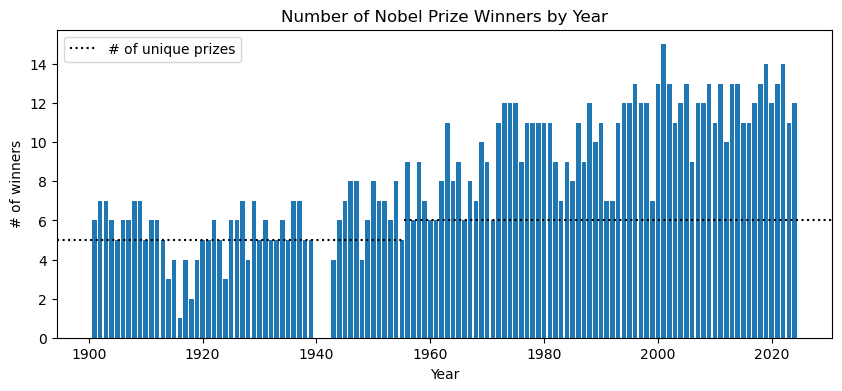

In [ ]:
plt.figure(figsize=(10,4))
first_year = min(winners.keys())
last_year = max(winners.keys())
prize_added = (last_year-first_econ)/(last_year-first_year)
plt.bar(winners.keys(), winners.values())
plt.axhline(len(unique_prizes)-1, xmax=prize_added, c='k', ls=':', label='# of unique prizes')
plt.axhline(len(unique_prizes), xmin=prize_added, c='k', ls=':')
plt.title("Number of Nobel Prize Winners by Year")
plt.legend()
plt.xlabel("Year")
plt.ylabel("# of winners")

In [190]:
# lets create a laureates dictionary

laureates_dict = []

for p in parsed_prizes:
    for l in p['laureates']:
        laureates_dict.append({
            'name': l[0],
            'url': l[1],
            'year': p['year'],
            'prize': p['title'],
            'desc': p['description']
        })

laureates_dict[0]

{'name': 'John J. Hopfield',
 'url': 'https://www.nobelprize.org/prizes/physics/2024/hopfield/facts/',
 'year': 2024,
 'prize': 'Nobel Prize in Physics',
 'desc': '“for foundational discoveries and inventions that enable machine learning with artificial neural networks”'}

In [191]:
# create a pandas dataframe

df = pd.DataFrame(laureates_dict)

df.head()

,name,url,year,prize,desc
0,John J. Hopfield,https://www.nobelprize.org/prizes/physics/2024...,2024,Nobel Prize in Physics,“for foundational discoveries and inventions t...
1,Geoffrey Hinton,https://www.nobelprize.org/prizes/physics/2024...,2024,Nobel Prize in Physics,“for foundational discoveries and inventions t...
2,David Baker,https://www.nobelprize.org/prizes/chemistry/20...,2024,Nobel Prize in Chemistry,“for computational protein design”
3,Demis Hassabis,https://www.nobelprize.org/prizes/chemistry/20...,2024,Nobel Prize in Chemistry,“for computational protein design”
4,John Jumper,https://www.nobelprize.org/prizes/chemistry/20...,2024,Nobel Prize in Chemistry,“for computational protein design”


In [ ]:
#df.to_csv('scraped_data.csv', index=False)